<a href="https://colab.research.google.com/github/HungYangChang/ECSE551/blob/master/bankruptcy_feature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform initial data analysis on bankruptcy data set

In [ ]:
# Import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load bankruptcy data
url = "https://raw.githubusercontent.com/jonarsenault/ecse551data/master/bankrupcy.csv"
bank_data = pd.read_csv(url)

# Display some of the data
print(bank_data.head())

# Print size of data
bank_data.shape

   attribute1  attribute2  attribute3  ...  attribute63  attribute64  ClassLabel
0     -0.0315     -0.0913     -0.0403  ...      -0.1740      -0.0468           0
1     -0.2320     -0.0494      0.3040  ...      -0.0731      -0.0272           0
2     -0.0586      0.0651     -0.4880  ...      -0.2920      -0.0336           0
3     -0.0694      0.0446     -0.1820  ...      -0.5550      -0.0468           0
4      0.2360     -0.0519      0.6780  ...      -0.0278      -0.0237           0

[5 rows x 65 columns]


(453, 65)

0    250
1    203
Name: ClassLabel, dtype: int64


Text(0, 0.5, 'Count')

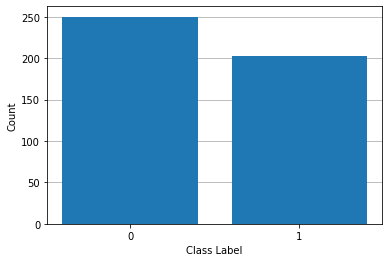

In [ ]:
# Plot distribution of class labels

label_counts = bank_data["ClassLabel"].value_counts()
print(label_counts)
unique_labels = bank_data["ClassLabel"].unique()

fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(unique_labels, label_counts, zorder=2)
ax.set_xticks([0,1])
ax.set_xticklabels(unique_labels)
ax.set_xlabel("Class Label")
ax.set_ylabel("Count")

In [ ]:
# Print summary statistics of features 
bank_data.iloc[:,:-1].describe()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute10,attribute11,attribute12,attribute13,attribute14,attribute15,attribute16,attribute17,attribute18,attribute19,attribute20,attribute21,attribute22,attribute23,attribute24,attribute25,attribute26,attribute27,attribute28,attribute29,attribute30,attribute31,attribute32,attribute33,attribute34,attribute35,attribute36,attribute37,attribute38,attribute39,attribute40,attribute41,attribute42,attribute43,attribute44,attribute45,attribute46,attribute47,attribute48,attribute49,attribute50,attribute51,attribute52,attribute53,attribute54,attribute55,attribute56,attribute57,attribute58,attribute59,attribute60,attribute61,attribute62,attribute63,attribute64
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.00000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,-0.079329,0.034849,-0.228204,-0.070187,0.007117,-0.070507,-0.006387,-0.137298,0.079628,-0.038179,-0.184612,-0.086773,-0.013439,-0.006392,-0.005153,-0.23991,-0.146144,-0.008432,-0.035658,0.096797,0.050098,-0.205164,-0.030013,-0.084634,-0.137836,-0.236385,-0.009777,-0.011449,-0.145535,0.044153,-0.034203,-0.009486,-0.103328,0.110358,-0.247298,-0.016978,-0.012521,-0.025538,-0.039993,-0.035146,-0.007386,-0.031183,0.012971,-0.001902,0.003613,-0.075185,-0.017667,-0.114832,-0.018169,-0.154670,0.223719,-0.010221,-0.011205,-0.011589,-0.101627,0.009393,-0.019739,-0.009330,0.022235,-0.028293,-0.005740,0.021030,-0.120022,-0.004343
std,0.252813,0.101913,1.032602,0.302937,0.012653,1.053857,0.046343,0.839836,0.955072,0.126544,0.746761,0.380864,0.021660,0.046342,0.241928,0.78927,0.815853,0.045649,0.504346,2.210859,1.349882,0.769030,0.426189,1.633206,0.403346,0.802891,0.001834,0.068906,0.985824,1.175464,0.530826,0.063428,0.532428,0.942146,0.977401,0.959335,0.242490,0.076521,0.506831,0.251033,0.000732,0.396027,0.531838,0.205564,0.021090,0.285901,0.059416,0.677625,0.376776,0.759908,1.025234,0.062096,0.142468,0.069628,0.516665,0.009096,0.306401,0.009146,0.588701,0.069107,0.480261,0.630186,0.534885,0.205593
min,-2.250000,-0.159000,-5.990000,-0.381000,-0.143000,-22.400000,-0.384000,-0.874000,-1.260000,-0.883000,-4.060000,-1.900000,-0.460000,-0.384000,-2.370000,-3.11000,-0.862000,-0.381000,-10.400000,-0.073400,-0.019100,-4.200000,-8.680000,-34.700000,-2.520000,-3.270000,-0.016900,-0.090400,-3.240000,-0.033900,-11.000000,-0.030700,-0.759000,-1.070000,-9.210000,-1.470000,-0.034700,-0.493000,-10.400000,-0.153000,-0.015400,-8.110000,-0.031300,-0.022300,-0.400000,-0.323000,-0.043800,-3.590000,-7.620000,-0.975000,-1.420000,-0.030100,-1.370000,-0.108000,-3.470000,-0.176000,-5.460000,-0.018200,-0.742000,-0.048600,-0.413000,-0.021100,-0.743000,-0.051000
25%,-0.140000,-0.030600,-0.799000,-0.223000,0.006530,-0.020400,-0.020200,-0.503000,-0.396000,-0.101000,-0.443000,-0.213000,-0.012900,-0.020200,-0.029200,-0.54300,-0.505000,-0.022100,-0.013600,-0.050100,-0.016500,-0.446000,-0.009000,-0.056600,-0.308000,-0.521000,-0.010000,-0.022400,-0.748000,-0.021900,-0.014900,-0.023100,-0.431000,-0.523000,-0.583000,-0.611000,-0.034400,-0.069300,-0.030900,-0.142000,-0.007440,-0.018000,-0.020700,-0.016400,0.003440,-0.225000,-0.034900,-0.371000,-0.006850,-0.559000,-0.493000,-0.022700,-0.033900,-0.022100,-0.138000,0.009200,-0.003230,-0.010600,-0.022500,-0.044000,-0.210000,-0.015800,-0.436000,-0.042000
50%,-0.062000,0.031500,-0.182000,

Text(0, 0.5, 'Standard Deviation')

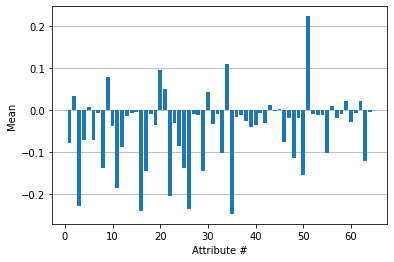

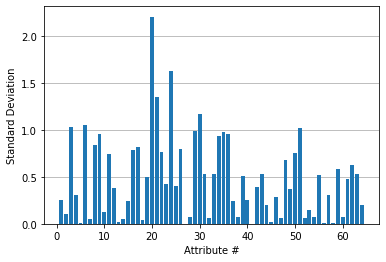

In [ ]:
# Compute mean of each feature
means = bank_data.iloc[:, :-1].mean()

# Compute standard deviation of each feature
std = bank_data.iloc[:, :-1].std()

# Plot mean and standard deviation of each attribute
attributes = np.arange(1, 65)
fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(attributes, means, zorder=2)
ax.set_xlabel("Attribute #")
ax.set_ylabel("Mean")

attributes = np.arange(1, 65)
fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(attributes, std, zorder=2)
ax.set_xlabel("Attribute #")
ax.set_ylabel("Standard Deviation")

[2.75045823e-01 3.23921053e-01 2.67651746e-01 2.71783804e-01
 4.97716648e-02 2.70361864e-02 2.74347072e-01 2.00752947e-01
 1.26992620e-01 2.96351133e-01 2.26470465e-01 2.75674590e-01
 2.27013077e-02 2.74337797e-01 6.19830874e-02 2.83007508e-01
 2.12310504e-01 2.74362780e-01 1.89208856e-02 3.90745749e-02
 4.39172088e-02 2.48605600e-01 2.76162680e-02 3.42217805e-02
 3.49247084e-01 2.79653810e-01 3.52320900e-02 4.92755751e-02
 1.26863148e-01 3.70307916e-02 1.12077470e-02 5.53071202e-02
 2.35000078e-01 1.37470460e-01 2.80011847e-01 2.68395701e-04
 3.95455316e-02 2.97520190e-01 3.85183566e-02 1.78685846e-01
 5.12180354e-02 2.28409959e-02 3.94258754e-02 3.99688971e-02
 7.10418336e-02 2.80750034e-01 1.83178577e-03 1.72548557e-01
 1.77660573e-02 2.52834440e-01 2.80591604e-01 3.29490041e-02
 3.81008012e-03 4.27209974e-02 8.50264700e-02 1.30432482e-02
 4.18265161e-02 3.36822212e-03 2.45378218e-02 6.05850045e-02
 2.53600494e-04 3.58633317e-02 2.68468877e-01 9.25621580e-02
 1.00000000e+00]
29


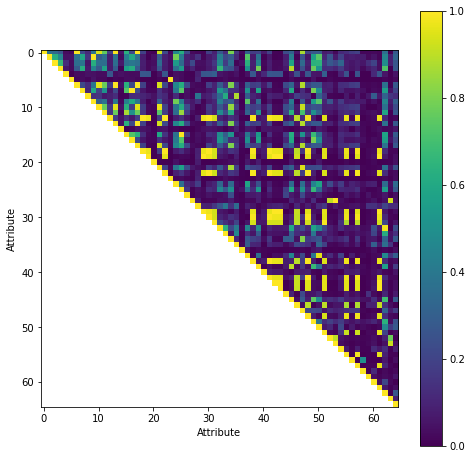

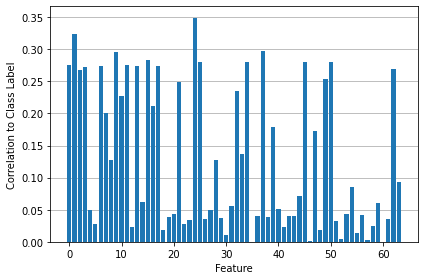

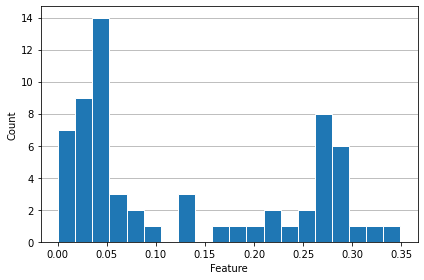

In [ ]:
# Compute correlation of features only
correlation = bank_data.corr()
correlation_arr = np.abs(correlation.to_numpy())

# upper right and lower left represent exactly the same thing,
# so fill nan to lower left
for i in range(correlation_arr.shape[0]):
    for j in range(i):
        correlation_arr[i,j] = np.nan

# Plot as image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(correlation_arr, vmin=0.0, vmax=1.0)
plt.colorbar(im)
ax.set_xlabel("Attribute")
ax.set_ylabel("Attribute")

# correalation btw Class and all attribute
print(correlation_arr[:,-1])


save_fig = True
# Plot bar graph of correlation to class label
features = np.arange(len(bank_data.columns[:-1]))
fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(features, correlation_arr[:-1, -1], zorder=2)
ax.set_xlabel("Feature")
ax.set_ylabel("Correlation to Class Label")
if save_fig:
  plt.tight_layout()
  plt.savefig("bank_correlation_bar.pdf", bbox_inches="tight", pad_inches=0)

save_fig = True
Threshold = 0.15
# Plot histogram  of correlation to class label
features = np.arange(len(bank_data.columns[:-1]))
fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.hist(correlation_arr[:-1, -1], bins=20, zorder=2, edgecolor="w")
#ax.vlines(Threshold, *ax.get_ylim(), color="r")

ax.set_xlabel("Feature")
ax.set_ylabel("Count")
if save_fig:
  plt.tight_layout()
  plt.savefig("bank_correlation_hist.pdf", bbox_inches="tight", pad_inches=0)

print(np.count_nonzero(bank_data.columns[correlation_arr[:,-1] < 5e-2]))

Text(0, 0.5, 'difference')

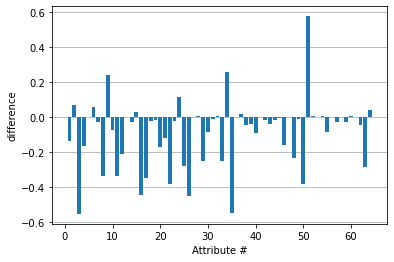

In [ ]:
# Compute mean of each attribute for each class
class_label_1 = bank_data.loc[bank_data.iloc[:,-1] == 1,]
class_label_0 = bank_data.loc[bank_data.iloc[:,-1] == 0,]

mean_1 = class_label_1.iloc[:, :-1].mean()
mean_0 = class_label_0.iloc[:, :-1].mean()

difference = mean_1 - mean_0

attributes = np.arange(1, 65)
fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(attributes, difference, zorder=2)
ax.set_xlabel("Attribute #")
ax.set_ylabel("difference")

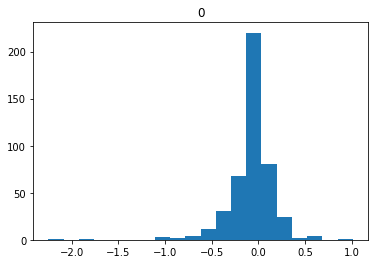

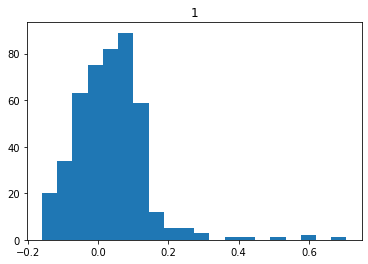

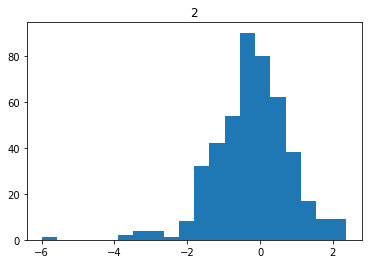

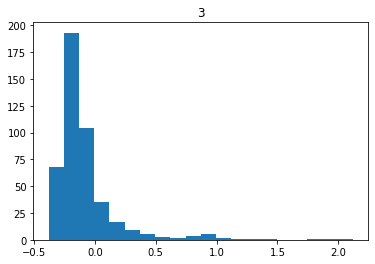

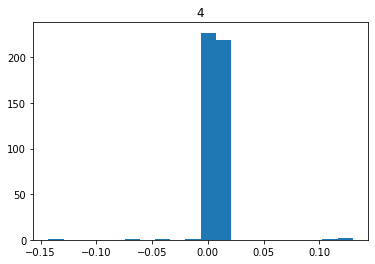

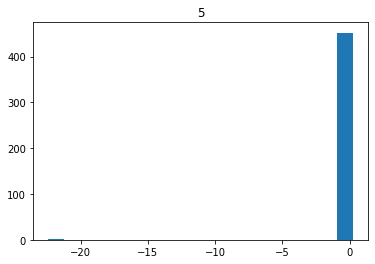

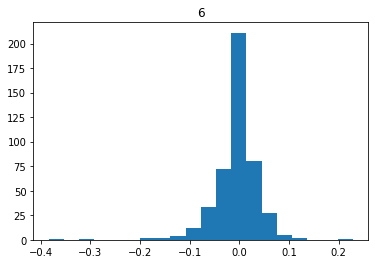

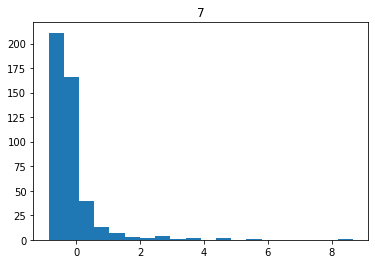

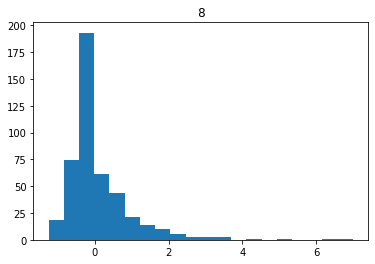

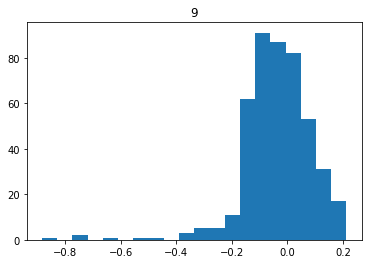

In [ ]:
# Feature 7
for i in range(10):
  fig, ax = plt.subplots()
  ax.set_title(i)
  ax.hist(bank_data.iloc[:, i], bins=20)




# ax.hist(bank_data.iloc[:,i], bins=30, density=True)

# norm = (bank_data.iloc[:,i] - bank_data.iloc[:,i].min())/(bank_data.iloc[:,i].max() - bank_data.iloc[:,i].min())
# fig, ax = plt.subplots()
# ax.hist(norm, bins=30, density=True )

# fig, ax = plt.subplots()
# ax.hist(np.log(norm+1e-2), bins=30, density=True )

